In [1]:
import numpy as np

In [2]:
# Vectors in python are written in the following style. This is
# a vector of floating point numbers of length 4
x = [-1.1, 0.0, 3.6, -7.2]
# We can find the length of the python vectors using len
len(x)
another = [1,2,3,4,5,6,7]
len(another)

7

In [3]:
# We can also represent arrays using numpy
y = np.array([-1.1, 0.0, 3.6, -7.2])
len(y)
# Oh cool, np arrays and python arrays are also equivalent!
x == y
# reveals array([ True,  True,  True,  True])


array([ True,  True,  True,  True])

In [4]:
# We can also create random vecotrs using np.random as per:
np.random.random(2)
# This led me down a fascinating path about the true randomness of this particular function.
# https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python
# Per the thread, its a pseudo-random algorithm, which shouldn't be used for cryptographic purposes as it
# can be reverse engineered. But you can also seed the random generator, which is interesting
np.random.seed(5)
np.random.random(2)
# seeding this yields the same result each time.

array([0.22199317, 0.87073231])

In [5]:
# Generating a unit vector at a specific location. This seems incredibly important
# This creates the unit vector at position 3 (index 2)
x = np.zeros(5)
x[2] = 1
print(x)
# Now, lets use this to find the ith value of an array
y = np.random.random(6)
unit_vector_3 = np.zeros(6)
unit_vector_3[3] = 1
# This will reveal the third index of the random array
print(np.inner(y, unit_vector_3))
print(y @ unit_vector_3)
# This is yet again the inner product, specifically from the General examples
# on page 20.

[0. 0. 1. 0. 0.]
0.6117438629026457
0.6117438629026457


In [6]:
# Net present value
c = np.array([0.1, 0.1, 0.1, 1.1]) #cash flow vector
n = len(c)
r = 0.05 #5% per-period interest rate
# In this, we're using list comprehension
# Source: https://www.w3schools.com/python/python_lists_comprehension.asp
# This seems difficult to read. Basically all its doing is computing
# (1+r)^i from 0 to the length of c.
# Net Present Value explanation: https://www.investopedia.com/terms/n/npv.asp
# So we are apparently just calcuating the time value of this money, and 
# Looking for a positive value which indicates a good investment.
d = np.array([(1+r)**-i for i in range(n)])
NPV = c@d
print(NPV)
# But, for this problem, no value of r can make this negative. TO be negative,
# we would need a negative cash flow vector:
c = np.array([-0.1, 0.1, 0.1, 0.1]) #cash flow vector
n = len(c)
r = 0.9 #90% per-period interest rate
d = np.array([(1+r)**-i for i in range(n)])
NPV = c@d
print(NPV)
# So with a high enough interest rate, one negative in the cash flow vector
# results in a negative value.
# But I digress. This is simply another example of the inner product from Section 1.4.

1.236162401468524
-0.005088205277737283


In [7]:
# If I wanted to brute force the inner product, I could write my own function
def inner_product(a, b):
    # This will hold the summation
    dot_product = 0
    # If they aren't the same size, we can't calculate this
    if len(a) != len(b):
        raise exception('a and b must be the same length')
    else:
        # Since they are the same size, we only need to iterate through one
        for i in range(len(a)):
            # Calculate each element's product
            dot_product += a[i]*b[i]
    # return the sum
    return dot_product

# Test it
a = np.array([1,2,3])
b = np.array([4,5,6])
# Woohoo it's true!
inner_product(a, b) == a@b

True

In [8]:
# Addition:
# This is weird notation, but I'll have to get used to it. This simply adds 2 to each
# element of x as per section 1.2
x = np.array([1,2,3,4])
# so, in effect, this is adding (1,2,3,4) and (2,2,2,2)
print (x+2)
# and this is adding (1,2,3,4) and (100, 100, 100, 100)
print(x+100)

[3 4 5 6]
[101 102 103 104]


In [9]:
# Multiplication
# This is extremely intuitive, whereas addition is not so much. This just multiplies
# 2.2 by each element in x as per section 1.3
x = np.array([1,2,3])
print(2.2*x)

# Similarly:
print (100*x)

[2.2 4.4 6.6]
[100 200 300]


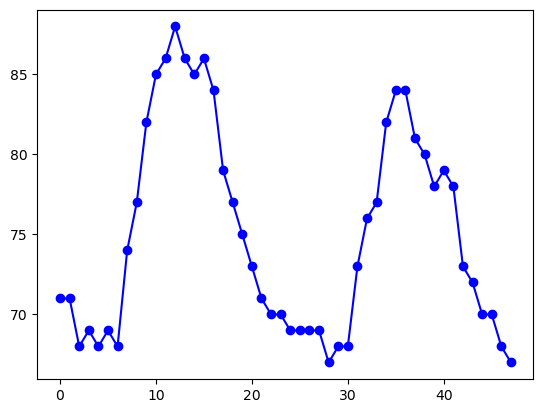

In [10]:
# Plotting
# I'm a little familiar with matplotlib, but this is a good refresher. This same image is found on page 8
# in the book
import matplotlib.pyplot as plt
plt.ion()
temps = [ 71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86, 88, 86,
85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69, 69, 67,
68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78, 73, 72,
70, 70, 68, 67 ]
plt.plot(temps, '-bo')
# plt.savefig('temperature.pdf', format = 'pdf')
plt.show()

In [11]:
# We can also change the formatting
plt.plot(temps, '-r+')
# plt.savefig('temperature.pdf', format = 'pdf')
plt.show()

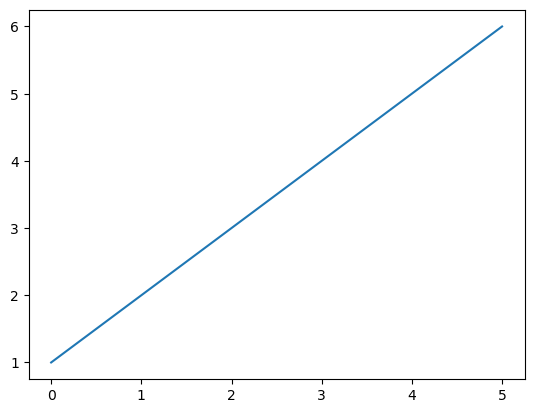

In [12]:
# And we can plot anything, like a straight line
plt.plot([1,2,3,4,5,6])
plt.show()

In [13]:
# Vector addition is discussed on page 11 in section 1.2
# Cool this is very intuitive, but I need to be careful that I don't mistake
# scalar and vector math in these instances
x = np.array([1,2,3])
y = np.array([100,200,300])
print('Sum of arrays:',x+y)
print('Difference of arrays:', x-y)

# Practicing creating zero vectors
a = np.array([1,2,3,4])
b = np.array([-1,-2,-3,-4])
print (a+b)
print (a-b)

Sum of arrays: [101 202 303]
Difference of arrays: [ -99 -198 -297]
[0 0 0 0]
[2 4 6 8]


In [14]:
# Sparse vectors
from scipy import sparse
# Here we are creating I with values, J as the zero vector, and V with values.
# Them, we create a COO matrix from arays that represent the row, column, and
# values of the nonzero elements. Ah, ok, so I is the row, J is the column, and
# V are the values in the sparse array.
I = np.array([4,7,8,9])
J = np.array([0,0,0,0])
V = np.array([100,200,300,400])
A = sparse.coo_matrix((V,(I,J)),shape = (10000,1))
print(A)
# View A in the todense() method
A.todense()

  (4, 0)	100
  (7, 0)	200
  (8, 0)	300
  (9, 0)	400


matrix([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])

In [15]:
# To calculate the school age population between 5 and 18, we concatenate
# zero arrays for the first 5, ones for the next 14 spaces (5-18 inclusive),
# and zeros again. This gives us a unit vector for only the ages between 5
# and 18, from which we can do the inner product!
# Here, I added x as a randomly generated vector of size 100.
x = np.random.random(100)
s = np.concatenate([np.zeros(5), np.ones(14), np.zeros(81)])
school_age_pop = s @ x
print(school_age_pop)

5.272637541908951
